In [6]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define input data and target labels for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define input data and target labels for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Initialize and train the MLP classifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='sgd', learning_rate_init=0.05,
                        max_iter=1000, tol=1e-3, random_state=42)
mlp_and.fit(X_and, y_and)

# Initialize and train the MLP classifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='sgd', learning_rate_init=0.05,
                        max_iter=1000, tol=1e-3, random_state=42)
mlp_xor.fit(X_xor, y_xor)

# Test the trained classifier for AND gate
print("MLPClassifier - AND Gate Test Results:")
for input_vector in X_and:
    output = mlp_and.predict([input_vector])
    print(f"Input: {input_vector}, Predicted output: {output[0]}")

# Test the trained classifier for XOR gate
print("\nMLPClassifier - XOR Gate Test Results:")
for input_vector in X_xor:
    output = mlp_xor.predict([input_vector])
    print(f"Input: {input_vector}, Predicted output: {output[0]}")


MLPClassifier - AND Gate Test Results:
Input: [0 0], Predicted output: 0
Input: [0 1], Predicted output: 0
Input: [1 0], Predicted output: 0
Input: [1 1], Predicted output: 1

MLPClassifier - XOR Gate Test Results:
Input: [0 0], Predicted output: 0
Input: [0 1], Predicted output: 1
Input: [1 0], Predicted output: 0
Input: [1 1], Predicted output: 0


In [7]:
import numpy as np

# Define the AND gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Initialize weights randomly
np.random.seed(42)
V = np.random.rand(2, 2)  # Weights connecting input to hidden layer
W = np.random.rand(2, 1)  # Weights connecting hidden layer to output

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
learning_rate = 0.05
convergence_error = 0.002
max_iterations = 1000

for iteration in range(max_iterations):
    # Forward pass
    hidden_layer_input = np.dot(X, V)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W)
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - predicted_output

    # Backward pass
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(W.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    W += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    V += X.T.dot(d_hidden_layer) * learning_rate

    # Check for convergence
    if np.max(np.abs(error)) <= convergence_error:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input, V)), W))
print("Predicted output for AND gate:")
print(test_output)

Predicted output for AND gate:
[[0.29631824]
 [0.27968751]
 [0.28742994]
 [0.27264214]]


AND gate with two output nodes converged in 1000 epochs


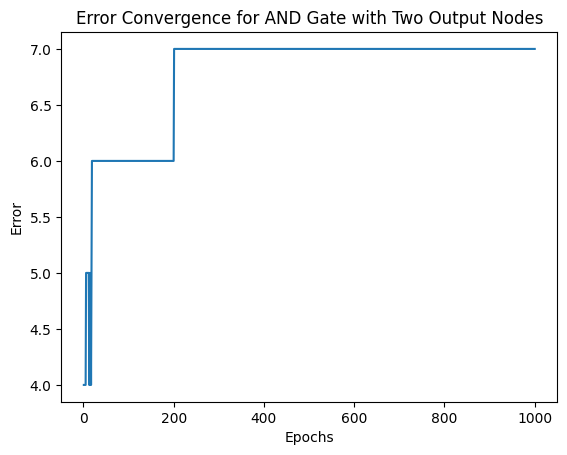

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function for binary output
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Function to train the perceptron with two output nodes
def train_perceptron_two_outputs(X, y, initial_weights, learning_rate, max_iterations=1000, convergence_error=0.002):
    weights = initial_weights
    error_values = []

    for epoch in range(max_iterations):
        errors = 0
        for i in range(X.shape[0]):
            y_pred = step_activation(np.dot(X[i], weights))
            error = y[i] - y_pred
            weights += learning_rate * np.outer(X[i], error)
            errors += np.sum(error ** 2)
        error_values.append(errors)
        if errors <= convergence_error:
            break

    return weights, error_values, epoch + 1

# Data for AND gate with two output nodes
X_and = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

# Two output nodes: [1, 0] for 0 and [0, 1] for 1
y_and = np.array([[1, 0],
                  [1, 0],
                  [1, 0],
                  [0, 1]])

# Initial weights for AND gate with two output nodes
initial_weights_and = np.array([[10, 0.2],
                                 [0.2, -0.75]])

# Training the perceptron for AND gate with two output nodes
learned_weights_and, error_values_and, epochs_and = train_perceptron_two_outputs(X_and, y_and, initial_weights_and, learning_rate=0.05)

print(f"AND gate with two output nodes converged in {epochs_and} epochs")

# Plotting epochs vs error for AND gate with two output nodes
plt.plot(range(1, len(error_values_and) + 1), error_values_and)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Convergence for AND Gate with Two Output Nodes')
plt.show()